In [ ]:
!pip install geopandas
import geopandas

     |████████████████████████████████| 1.0 MB 6.8 MB/s 
     |████████████████████████████████| 15.4 MB 46.5 MB/s 
     |████████████████████████████████| 6.3 MB 48.2 MB/s 


1. visualizzi la mappa d'Italia con tutte le regioni. Fare in modo che i confini delle regioni siano in blu e che sia visibile al di sotto delle regioni la cartina geografica dell'Italia

In [ ]:
!pip install contextily
import contextily as ctx

     |████████████████████████████████| 19.3 MB 413 kB/s 


In [ ]:
regioni

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry
0,1,1,Piemonte,1.235512e+06,2.539390e+10,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
1,1,2,Valle d'Aosta,3.109681e+05,3.258838e+09,"POLYGON ((390652.644 5091766.171, 390748.643 5..."
2,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366..."
3,2,4,Trentino-Alto Adige,8.008937e+05,1.360755e+10,"POLYGON ((743267.749 5219765.793, 743387.812 5..."
4,2,5,Veneto,1.054587e+06,1.834355e+10,"POLYGON ((768123.960 5175397.497, 768135.210 5..."
5,2,6,Friuli Venezia Giulia,6.700448e+05,7.933911e+09,"MULTIPOLYGON (((872344.457 5061894.048, 872344..."
6,1,7,Liguria,8.205420e+05,5.414612e+09,"MULTIPOLYGON (((568226.691 4874823.573, 568219..."
7,2,8,Emilia-Romagna,1.176188e+06,2.244275e+10,"MULTIPOLYGON (((618343.929 4893985.661, 618335..."
8,3,9,Toscana,1.306596e+06,2.298352e+10,"MULTIPOLYGON (((674426.642 4680710.364, 674563..."
9,3,10,Umbria,6.197684e+05,8.464380e+09,"MULTIPOLYGON (((776982.140 4832209.918, 776910..."


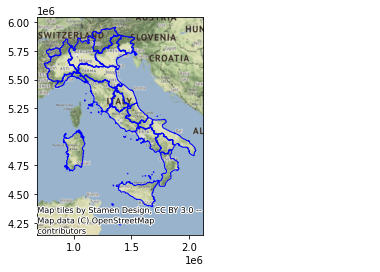

In [ ]:
regioni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Reg01012021_g/Reg01012021_g_WGS84.dbf")
ax = regioni.to_crs(epsg=3857).plot(facecolor="none",edgecolor="b")
ctx.add_basemap(ax)

2. sostituire alla cartina geografica dell'Italia un altro tipo di mappa

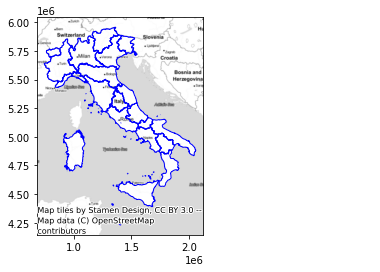

In [ ]:
import xyzservices.providers as xyz
ax = regioni.to_crs(epsg=3857).plot(facecolor="none",edgecolor="b")
ctx.add_basemap(ax,source=ctx.providers.Stamen.TonerLite)

3. visualizzare le province della Lombardia su una mappa di contextily

In [ ]:
province = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/ProvCM01012021_g/ProvCM01012021_g_WGS84.dbf")
province

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,-,Torino,Torino,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5..."
1,1,1,2,0,2,Vercelli,-,Vercelli,VC,Provincia,418078.067821,2.082097e+09,"POLYGON ((438328.612 5087208.215, 439028.888 5..."
2,1,1,3,0,3,Novara,-,Novara,NO,Provincia,250242.112077,1.341318e+09,"POLYGON ((460929.542 5076320.298, 461165.259 5..."
3,1,1,4,0,4,Cuneo,-,Cuneo,CN,Provincia,490111.881318,6.898443e+09,"MULTIPOLYGON (((378673.492 4958865.159, 378928..."
4,1,1,5,0,5,Asti,-,Asti,AT,Provincia,315563.261771,1.508947e+09,"POLYGON ((425041.329 4997628.309, 424948.989 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,1,1,103,0,103,Verbano-Cusio-Ossola,-,Verbano-Cusio-Ossola,VB,Provincia,299029.117691,2.262164e+09,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
103,1,3,108,0,108,Monza e della Brianza,-,Monza e della Brianza,MB,Provincia,126272.490811,4.055793e+08,"POLYGON ((519754.706 5065242.380, 520199.702 5..."
104,3,11,109,0,109,Fermo,-,Fermo,FM,Provincia,198635.321418,8.619365e+08,"POLYGON ((884760.019 4804406.440, 885511.011 4..."
105,4,16,110,0,110,Barletta-Andria-Trani,-,Barletta-Andria-Trani,BT,Provincia,237762.889058,1.542032e+09,"POLYGON ((1081237.144 4611047.023, 1081399.393..."


In [ ]:
lombardia = regioni[regioni.DEN_REG == "Lombardia"]
lombardia

,COD_RIP,COD_REG,DEN_REG,Shape_Leng,Shape_Area,geometry
2,1,3,Lombardia,1.410223e+06,2.386232e+10,"MULTIPOLYGON (((485536.366 4985444.605, 485366..."


In [ ]:
provinceLombardia = province[province.within(lombardia.geometry.squeeze())]
provinceLombardia

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
11,1,3,12,0,12,Varese,-,Varese,VA,Provincia,246016.658456,1.199334e+09,"POLYGON ((483071.566 5104606.092, 483258.471 5..."
12,1,3,13,0,13,Como,-,Como,CO,Provincia,260565.230534,1.279301e+09,"MULTIPOLYGON (((498077.207 5089780.202, 497614..."
13,1,3,14,0,14,Sondrio,-,Sondrio,SO,Provincia,464265.098278,3.194949e+09,"POLYGON ((595652.358 5163515.659, 596042.420 5..."
14,1,3,15,215,215,-,Milano,Milano,MI,Citta metropolitana,309951.219188,1.575033e+09,"MULTIPOLYGON (((538136.289 5004372.814, 539162..."
15,1,3,16,0,16,Bergamo,-,Bergamo,BG,Provincia,310847.260446,2.754672e+09,"POLYGON ((585288.233 5104483.085, 585414.669 5..."
16,1,3,17,0,17,Brescia,-,Brescia,BS,Provincia,446387.375203,4.787545e+09,"POLYGON ((615296.024 5132340.876, 615374.024 5..."
17,1,3,18,0,18,Pavia,-,Pavia,PV,Provincia,449504.645144,2.967086e+09,"MULTIPOLYGON (((485536.366 4985444.605, 485366..."
18,1,3,19,0,19,Cremona,-,Cremona,CR,Provincia,365500.445250,1.769382e+09,"POLYGON ((542189.537 5037362.585, 542408.347 5..."
19,1,3,20,0,20,Mantova,-,Mantova,MN,Provincia,386685.850910,2.341796e+09,"POLYGON ((630538.958 5031669.589, 632819.864 5..."
96,1,3,97,0,97,Lecco,-,Lecco,LC,Provincia,181294.401343,8.056511e+08,"POLYGON ((532079.618 5104664.092, 533286.608 5..."


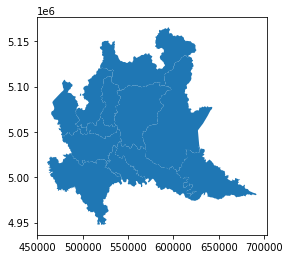

In [ ]:
provinceLombardia.plot()

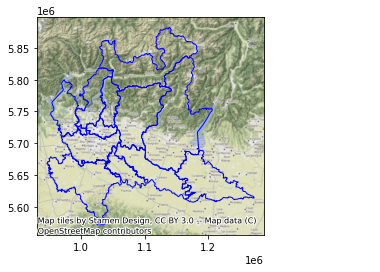

In [ ]:
ax = provinceLombardia.to_crs(epsg=3857).plot(facecolor="none",edgecolor="b")
ctx.add_basemap(ax)

4. visualizzare la provincia di Milano su una mappa di contextily con i confini amministrativi del comune di Milano. Usare colori adatti

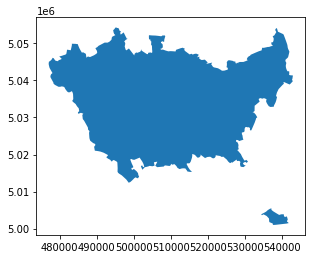

In [ ]:
milano = provinceLombardia[provinceLombardia.DEN_UTS == "Milano"]
milano.plot()

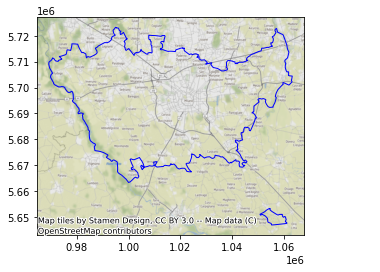

In [ ]:
ax = milano.to_crs(epsg=3857).plot(facecolor="none",edgecolor="b")
ctx.add_basemap(ax)

5. utilizzando le informazioni geografiche riguardanti i quartieri di Milano, visualizzare sia i confini di Milano sia i confini dei quartieri. 

In [ ]:
comuni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Com01012021_g/Com01012021_g_WGS84.dbf")
comuni

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,1001,001001,AgliÃ¨,None,0,16097.848297,1.330696e+07,"POLYGON ((404703.558 5026682.655, 405359.554 5..."
1,1,1,1,201,201,1002,001002,Airasca,None,0,16684.218599,1.595353e+07,"POLYGON ((380700.909 4977305.520, 381105.998 4..."
2,1,1,1,201,201,1003,001003,Ala di Stura,None,0,29892.674582,4.575189e+07,"POLYGON ((364710.857 5022090.678, 364737.794 5..."
3,1,1,1,201,201,1004,001004,Albiano d'Ivrea,None,0,16192.656480,1.103356e+07,"POLYGON ((415942.504 5033304.609, 416079.315 5..."
4,1,1,1,201,201,1006,001006,Almese,None,0,16077.245089,1.771710e+07,"POLYGON ((376934.962 4999073.854, 376960.555 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,5,20,111,0,111,111103,111103,Villaputzu,None,0,100515.537851,1.807260e+08,"MULTIPOLYGON (((556602.772 4375162.650, 556598..."
7899,5,20,111,0,111,111104,111104,Villasalto,None,0,58635.095264,1.303933e+08,"POLYGON ((541186.146 4375105.653, 541180.146 4..."
7900,5,20,111,0,111,111105,111105,Villasimius,None,0,49735.818257,5.759282e+07,"MULTIPOLYGON (((546451.098 4325900.553, 546443..."
7901,5,20,111,0,111,111106,111106,Villasor,None,0,53375.684321,8.640693e+07,"POLYGON ((500362.475 4361229.767, 500397.474 4..."


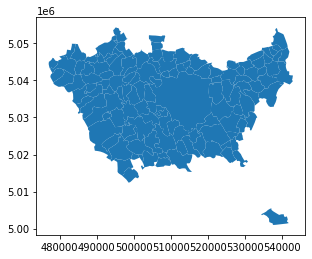

In [ ]:
quartieriMilano = comuni[comuni.within(milano.geometry.squeeze())]
quartieriMilano.plot()

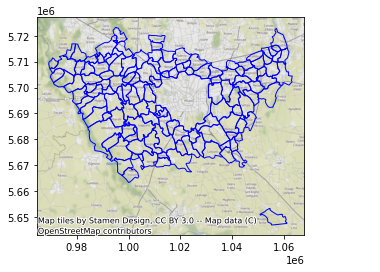

In [ ]:
ax = quartieriMilano.to_crs(epsg=3857).plot(facecolor="none",edgecolor="b")
ctx.add_basemap(ax)

6. far inserire all'utente una provincia della Lombardia e visualizzare tutte le province lombarde  confinanti. Controllare che la provincia inserita sia effettivamente in Lombardia.

Inserire una provincia della Lombardia Milano
trovato


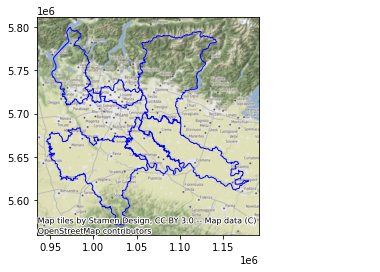

In [ ]:
x = input("Inserire una provincia della Lombardia ")
if x in provinceLombardia["DEN_UTS"].tolist():
  print("trovato")
  ax = provinceLombardia[provinceLombardia.touches(provinceLombardia[provinceLombardia.DEN_UTS == x].geometry.squeeze())].to_crs(epsg=3857).plot(facecolor="none",edgecolor="b")
  ctx.add_basemap(ax)
else:
  print("Provincia inesistente")
